## Train and evaluate deep learning models

Deep learning is an advanced form of machine learning that emulates the way the human brain learns through networks of connected neurons.

Associated with each x value is a weigh(w), which is used to strengthen or weaken the effect of the x value to simulate learning.

Additionally, a bias(b) input is added to enable fine-grained control over the network.

During the training process, thw **w** and **b** values will be adjusted to tune the network so that it "learns" to produce correct outupts.

The neuron itself encapsualtes a function that calculates a weighted sum of **x,w, and b**. This function is in turn encosed in an activation function that constrains the results(often to a value between 0 and 1) to determine whether or not the neuron passes an output onto the next layer of nuerons in the network. 

### Deep neural network(DNN) concepts

When you create a DNN model, you must define an input layer that supports the number of features your model will process , and an output layer that reflects the number of outputs you expect it to produce.

You can decide how many hidden layers you want to include and how many neurons are in each of them; but you have no control over the input and output values for these layers- these are determined by the model training process.






#### Train a deep neural network

The training process for a deep neural network consists of multiple iterations, called **epochs**. 

For the first epoch,you start by assigning random initialization values for the weights(w) and bias(b) values. Then the process is as follows:

1. Features for data observations with known values are submitted to the input layer. Generally, these observations are grouped into batches(often referred to as mini-batches)

2. The neurons then apply thier function, and if activated, pass result onto the next layer until the output layer produces a prediction.

3. The prediction is compared to the actual known value, and the amount of variance between the predicted and the true values(which we call the loss) is calculated.

4. Based on the results,revised values for  the weights and bias values are calculated to reduce the loss, and this adjustments are **backpropagated** to the neurons in the network layers.

5. The next epoch repeats the batch training forward pass with the revised weight and bias values, hopefully improving the accuracy of the model(by reducing the loss)



### A closer look at the loss function and backpropagation


#### 1. Calculating loss
#### 2. Optimizers
The loss is calculated using a function, which operates on the results from the final layer of the network, which is also a function. The final layer of network operates on the outputs from the previos layers, which are also functions. So in effect, the entire model from the input layer right through to the loss calculation is just one big nested function. Functions have a few really useful characteristics, including:
- You can conceptualize a function as a plotted line comparing the output with each of its variables.
- You can use differential calculus to calculate the derivatives of the function at any point with respect to its variables

We use **optimizer** to determine in which direction we need to adjust the weightd and bias (up or down) to reduce the overall amount of loss in the model.

There are multiple commonly used optimization algorithmns:
- stochastic gradient descent(SGD)
- Adaptive Learning Rate(ADADELTA)
- Adaptive Momentum Estimation(Adam)
All are designed to figure out how to adjust the weights and biases to minimize loss

#### 3. Learning rate
The next question i, how much should the oprimizer adjust  the weights and bias value?

The size of the adjustments is controlled by a parameter that you set training called the **learning rate**
- A low learning rate results in small adjustments( so it can take more epochs to minimize the loss)
- A high learning rate results in large adjustments(so you might miss the minimun altogether)

### Deep Learning with TensorFlow


#### Explore the dataset


In [1]:
import pandas as pd

# load the training dataset (excluding rows with null values)
penguins = pd.read_csv('penguins.csv').dropna()

# we'll just rescale the FlipperLength and BodyMass so they're on a similar scale to the bill measurements
penguins['FlipperLength'] = penguins['FlipperLength']/10
penguins['BodyMass'] = penguins['BodyMass']/100

# The dataset is too small to be useful for deep learning
# So we'll oversample it to increase its size
for i in range(1,3):
    penguins = penguins.append(penguins)

# Display a random sample of 10 observations
sample = penguins.sample(10)
sample


,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
160,43.3,13.4,20.9,44.00,1
249,46.9,14.6,22.2,48.75,1
194,45.3,13.7,21.0,43.00,1
198,45.5,13.9,21.0,42.00,1
248,49.4,15.8,21.6,49.25,1
123,41.4,18.5,20.2,38.75,0
265,51.5,16.3,23.0,55.00,1
164,45.5,13.7,21.4,46.50,1
178,44.5,14.3,21.6,41.00,1
105,39.7,18.9,18.4,35.50,0


The Species column is the label our model will predict. Each label value represents a class of penguin species, encoded as 0, 1, or 2. The following code shows the actual species to which these class labels corrrespond.

In [5]:
penguin_classes = ['Adelie', 'Gentoo', 'Chinstrap']
print(sample.columns[0:5].values, 'SpeciesName')
for index, row in penguins.sample(10).iterrows():
    print('[',row[0], row[1], row[2],row[3], int(row[4]), ']',penguin_classes[int(row[-1])])

['CulmenLength' 'CulmenDepth' 'FlipperLength' 'BodyMass' 'Species'] SpeciesName
[ 45.3 13.7 21.0 43.0 1 ] Gentoo
[ 48.7 14.1 21.0 44.5 1 ] Gentoo
[ 49.1 15.0 22.8 55.0 1 ] Gentoo
[ 37.8 17.1 18.6 33.0 0 ] Adelie
[ 46.0 18.9 19.5 41.5 2 ] Chinstrap
[ 51.5 16.3 23.0 55.0 1 ] Gentoo
[ 40.1 18.9 18.8 43.0 0 ] Adelie
[ 46.4 15.6 22.1 50.0 1 ] Gentoo
[ 42.8 18.5 19.5 42.5 0 ] Adelie
[ 42.1 19.1 19.5 40.0 0 ] Adelie


As is common in a supervised learning problem, we'll split the dataset into a set of records with which to train the model, and a smaller set with which to validate the trained model.

In [6]:
from sklearn.model_selection import train_test_split

features = ['CulmenLength','CulmenDepth','FlipperLength','BodyMass']
label = 'Species'
   
# Split data 70%-30% into training set and test set
x_train, x_test, y_train, y_test = train_test_split(penguins[features].values,
                                                    penguins[label].values,
                                                    test_size=0.30,
                                                    random_state=0)

print ('Training Set: %d, Test Set: %d \n' % (len(x_train), len(x_test)))
print("Sample of features and labels:")

# Take a look at the first 25 training features and corresponding labels
for n in range(0,24):
    print(x_train[n], y_train[n], '(' + penguin_classes[y_train[n]] + ')')

Training Set: 957, Test Set: 411 

Sample of features and labels:
[51.1 16.5 22.5 52.5] 1 (Gentoo)
[50.7 19.7 20.3 40.5] 2 (Chinstrap)
[49.5 16.2 22.9 58. ] 1 (Gentoo)
[39.3 20.6 19.  36.5] 0 (Adelie)
[42.5 20.7 19.7 45. ] 0 (Adelie)
[50.  15.3 22.  55.5] 1 (Gentoo)
[50.2  18.7  19.8  37.75] 2 (Chinstrap)
[50.7 19.7 20.3 40.5] 2 (Chinstrap)
[49.1  14.5  21.2  46.25] 1 (Gentoo)
[43.2 16.6 18.7 29. ] 2 (Chinstrap)
[38.8  17.6  19.1  32.75] 0 (Adelie)
[37.8 17.1 18.6 33. ] 0 (Adelie)
[45.8 14.2 21.9 47. ] 1 (Gentoo)
[43.8 13.9 20.8 43. ] 1 (Gentoo)
[36.  17.1 18.7 37. ] 0 (Adelie)
[43.3 13.4 20.9 44. ] 1 (Gentoo)
[36.  18.5 18.6 31. ] 0 (Adelie)
[41.1  19.   18.2  34.25] 0 (Adelie)
[33.1 16.1 17.8 29. ] 0 (Adelie)
[40.9 13.7 21.4 46.5] 1 (Gentoo)
[45.2 17.8 19.8 39.5] 2 (Chinstrap)
[48.4 14.6 21.3 58.5] 1 (Gentoo)
[43.6 13.9 21.7 49. ] 1 (Gentoo)
[38.5  17.9  19.   33.25] 0 (Adelie)


The features are the measurements for each penguin observation, and the label is a numeric value that indicates the species of penguin that the observation represents (Adelie, Gentoo, or Chinstrap).

### Install and import TensorFlow libraries


In [7]:
# pip install tensorflow

import tensorflow
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense
from tensorflow.keras import utils
from tensorflow.keras import optimizers

# Set random seed for reproducability
tensorflow.random.set_seed(0)

print("Libraries imported.")
print('Keras version:',keras.__version__)
print('TensorFlow version:',tensorflow.__version__)

Libraries imported.
Keras version: 2.6.0
TensorFlow version: 2.6.0


### Prepare the data for TensorFlow

We've already loaded our data and split it into training and validation datasets. However, we need to do some further data preparation so that our data will work correctly with TensorFlow. Specifically, we need to set the data type of our features to 32-bit floating point numbers, and specify that the labels represent categorical classes rather than numeric values.

In [9]:
# Set data type for float features
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Set data types for categorical labels
y_train = utils.to_categorical(y_train)
y_test = utils.to_categorical(y_test)
print('Ready...')

Ready...


### Define a neural network

We'll create a network that consists of 3 fully-connected layers:
- An input layer that receives an input value in each fearure (in this case, the four penguin measurements) and applies a RELU activation function.
- A hidden layer that receives ten inputs and applies a RELU activation function.
- An output layer that uses a SoftMax activation function to generate an output for penguin species(which represents the classification probabilities for each of the possible penguin species)
**Softmax** functions produce a vector with probability values that sum to 1

In [10]:
# Define a classifier network
h1 = 10 # Number of hidden layer nodes

model = Sequential()
model.add(Dense(h1,input_dim=len(features),activation='relu'))
model.add(Dense(h1,input_dim=h1,activation='relu'))
model.add(Dense(len(penguin_classes),input_dim=h1,activation='softmax'))

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                50        
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 33        
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________
None


### Train the model

To train the model, we need to repeatedly feed the training values forward through the network, use a loss function to calculate the loss,use an optimizer to backpropagate the weight and bias value adjustments, and validate the model using the test data we withheld.

To do this, we'll apply an **Adam optimizer** to a **categorical cross-entropy loss function** iteratively over 50 epochs.

In [12]:
# hyper-parameters for optmizer
learning_rate = 0.001
opt = optimizers.Adam(lr=learning_rate)

model.compile(loss='categorical_crossentropy',
             optimizer=opt,
             metrics=['accuracy'])

# Train the model over 50 epochs using 10-observations batches and using the test holdout dataset for validation
num_epochs = 50
history = model.fit(x_train,y_train,epochs=num_epochs,batch_size = 10,validation_data=(x_test,y_test))

C:\Users\User-Pc\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/50
96/96 [==============================] - 3s 10ms/step - loss: 23.8942 - accuracy: 0.1912 - val_loss: 11.2900 - val_accuracy: 0.2165
Epoch 2/50
96/96 [==============================] - 0s 4ms/step - loss: 5.0865 - accuracy: 0.2142 - val_loss: 1.5626 - val_accuracy: 0.1752
Epoch 3/50
96/96 [==============================] - 0s 4ms/step - loss: 1.2712 - accuracy: 0.2727 - val_loss: 1.1591 - val_accuracy: 0.3139
Epoch 4/50
96/96 [==============================] - 0s 4ms/step - loss: 1.1068 - accuracy: 0.3814 - val_loss: 1.0832 - val_accuracy: 0.4453
Epoch 5/50
96/96 [==============================] - 0s 4ms/step - loss: 1.0432 - accuracy: 0.4598 - val_loss: 1.0545 - val_accuracy: 0.4574
Epoch 6/50
96/96 [==============================] - 1s 6ms/step - loss: 1.0258 - accuracy: 0.5183 - val_loss: 1.0425 - val_accuracy: 0.4842
Epoch 7/50
96/96 [==============================] - 0s 4ms/step - loss: 1.0118 - accuracy: 0.5601 - val_loss: 1.0315 - val_accuracy: 0.5547
Epoch 8/50
96/96 

### Review training and validation loss

Afte training is complete, we can examine the loss meric we recorded while training and validating the model.
- The loss should reduce with each epoch, showing that the model is learning the right weights and biases to predict the correct labels
- The training loss and validation loss should follow a similar trend, showing that the model is not **overfitting** to the training data.

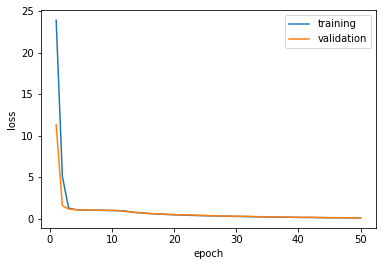

In [15]:
# let's plot the loss metrics
import matplotlib.pyplot as plt

epoch_nums = range(1,num_epochs+1)
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
plt.plot(epoch_nums,training_loss)
plt.plot(epoch_nums,validation_loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['training','validation'],loc='upper right')
plt.show()

### View the learned weights and biases

The trained model consists of the final-weights and biases that were determined by the optimizer during training. Based on our network model we should expect the following values for for each layer:

- Layer 1: There are 4 input values going to ten output nodes, so there should be 4 x 10 weghts and 10 bias values
- Layer 2: There are 10 input values going to 10 output nodes, so there should be 10 x 10 weights and 10 bias values.
- Layer 3: There are ten input values going to three output nodes, so there should be 10 x 3 weights and 3 bias values.

In [16]:
for layer in model.layers:
    weights = layer.get_weights()[0]
    biases = layer.get_weights()[1]
    print('--------\nWeights:\n',weights,'\nBiases',biases)

--------
Weights:
 [[-0.27236846 -0.3841947   0.03324002  0.08020484 -0.10909867  0.05677445
  -0.19284698  0.8463785   0.35794353 -0.4905011 ]
 [ 0.27471453  0.21265197  0.08151422 -0.17707926 -0.10406601  0.8080873
   0.34789598 -0.05428047 -0.607791   -0.5447268 ]
 [-0.28836262 -0.634329    0.2833845   0.34767175  0.23550075 -0.01212122
   0.14559275 -0.797869   -0.5164289   0.3296095 ]
 [-0.42851955 -0.24623463 -0.28597653 -0.5230521  -0.43773973  0.3698575
  -0.0764817   0.23638242  0.75253886 -0.4691702 ]] 
Biases [ 0.          0.         -0.01292539  0.          0.          0.20184621
 -0.19173315 -0.26134843 -0.31521472  0.        ]
--------
Weights:
 [[ 0.0607031  -0.30530828  0.39975524  0.3037489   0.15896738  0.03326017
  -0.53190327  0.40915883 -0.03316814 -0.1240823 ]
 [ 0.42301047  0.14984506 -0.54566675  0.3919103  -0.4295466   0.50397205
  -0.31616646  0.17803025 -0.41518384 -0.38429344]
 [ 0.5336163   0.37752342 -0.4694244   0.17206895 -0.04215616  0.5297911
   0.4356

### Evaluate model perfomance

A common way to visualize the performance of a classification model is to create a confusion matrix that shows a crosstab of correct and incorrect predictions for each class.

Tensorflow doesn't have a built-in confusion matrix metric, so we will use Scikit-learn

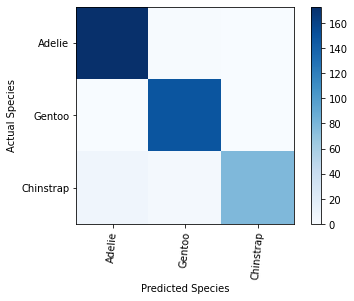

In [18]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline


class_probabilities = model.predict(x_test)
predictions = np.argmax(class_probabilities, axis=1)
true_labels = np.argmax(y_test, axis=1)

# Plot the confusion matrix
cm = confusion_matrix(true_labels, predictions)
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(penguin_classes))
plt.xticks(tick_marks, penguin_classes, rotation=85)
plt.yticks(tick_marks, penguin_classes)
plt.xlabel("Predicted Species")
plt.ylabel("Actual Species")
plt.show()

### Save the trained model


In [19]:
modelFileName = 'models/penguin-classifier.h5'
model.save(modelFileName)
del model # deletes the existing model variable
print('model saved as,',modelFileName)

model saved as, models/penguin-classifier.h5


#### Use the trained model

When we have a new penguin observation, we can use the model to predict the species.



In [20]:
# Load the saved model
model = models.load_model(modelFileName)

# CReate a new array of features
x_new = np.array([[50.4,15.3,20,50]])
print ('New sample: {}'.format(x_new))

# Use the model to predict the class
class_probabilities = model.predict(x_new)
predictions = np.argmax(class_probabilities, axis=1)

print(penguin_classes[predictions[0]])

New sample: [[50.4 15.3 20.  50. ]]
Gentoo


## Convolutional neural networks

At hte heart of deep learning's success in this area is a kind of model called a **convolutional network or CNN**. A CNN typically works by extracting features from images,and then feeding those features into a fully connected neural network to generate a prediction. The feature extraction layers in the network have the effect of reducing the number of features from the potentially huge array of individuals pixel values to a smaller feature e that supports label prediction.

### Layers in a CNN
CNNs consists of multiple layers,each performing a specific task in extracting features or predicting labels.

##### 1. Convolution layers
It extracts important features in images. It works by applying a filter to images. The filter is defined by a **kernel** that consists of a matrix of weight values

Because of the size of the filter kernel,we can't calculate values for the pixels at the adge;so we typically just apply a padding value(often 0)

The output of the convolution is typically passed to an activation function,which is often a **Rectified Linear Unit** function that ensures negative values are set to 0
The resulting matrix is a feature map of feature values that can be used to train a machine learnung model.

Typically, a convolutional layer applies multiple filter kernels. Each  filter produces a different feature map, and all of the feature maps are passed onto the next layer of the network.

##### 2. Pooling layers
After extracting feature values from images, pooling (or downscaling) layers are used to reduce the number of feature values while retaining the key differentiating features that have been extracted.

One of the most common kinds of pooling is **max poolong** in which a filter is applied to the image, and only the maximum pixel value within the filter area is retained.

##### 3. Dropping layers
One of the most common challenges in a CNN is the avaoidance of **overfitting**, where the resulting model performs well with the training data but doen't generalize well to new data on which it wasn't trained.

One technique you can use to mitigate overfitting is to include layers in which the training process randomly eliminates(or "drops") feature maps. This may seem counterintuitive, but it's an effective way to ensure that the model doesn't learn to be over-dependent on the training images.

Other techniques you can use to mitigate overfitting include randomly flipping, mirroring, or skewing the training images to generate data that varies between training epochs.

##### 4. Flattening layers

It is used to flatten the feature maps into a vector of values that can be used as input to a fully connected layer.

##### 5. Fully connected layers

Usually,a CNN ends with a fully connected network in which the feature values are passed into a layer, thruogh one or more hidden layers, and generate predicted values in an ouput layer.


### Train a CNN model

As with any deep neural network, a CNN is trained by passing batches of training data through it over multiple epochs,adjusting the weights and bias values based on the loss calculated for each epoch. In the case of a CNN, backpropagation of adjusted weights includes filter kernel weights used in convolutional layers as well as the weights usd in fully connected layers.

### COnvolutional Neural Networks with TensorFlow

"Deep Learning" is a general term that usually refers to the use of neural networks with multiple layers that synthesize the way the human brain learns and makes decisions. A convolutional neural network is a kind of neural network that extracts features from matrices of numeric values (often images) by convolving multiple filters over the matrix values to apply weights and identify patterns, such as edges, corners, and so on in an image. The numeric representations of these patterns are then passed to a fully-connected neural network layer to map the features to specific classes.

There are several commonly used frameworks for creating CNNs. In this notebook, we'll build a simple example CNN using TensorFlow.


In [1]:
##### import and install libraries

import tensorflow
from tensorflow import keras

#### Explore the data
In this exercise,we'll train a CNN-based classidication model that can classify images of geometric shapes.Let's take a look at the classes of shapes the model needs to identify

### Prepare the data

Before we can train the model, we need to prepare the data. We'll divide the feature values by 255 to normalize them as floating point values between 0 and 1, and we'll split the data so that we can use 70% of it to train the model, and hold back 30% to validate it. When loading the data, the data generator will assign "hot-encoded" numeric labels to indicate which class each image belongs to based on the subfolders in which the data is stored. In this case, there are three subfolders - circle, square, and triangle, so the labels will consist of three 0 or 1 values indicating which of these classes is associated with the image - for example the label [0 1 0] indicates that the image belongs to the second class (square).


### Define the CNN

Now we're ready to create our model. This involves defining the layers for our CNN, and compiling them for multi-class classification.

#### Train the model
With the layers of the CNN defined, we're ready to train the model using our image data. In the example below, we use 5 iterations (epochs) to train the model in 30-image batches, holding back 30% of the data for validation. After each epoch, the loss function measures the error (loss) in the model and adjusts the weights (which were randomly generated for the first iteration) to try to improve accuracy.

#### View the loss history

We tracked average training and validation loss history for each epoch. We can plot these to verify that loss reduced as the model was trained, and to detect overfitting (which is indicated by a continued drop in training loss after validation loss has levelled out or started to increase).

#### Evaluate model performance

We can see the final accuracy based on the test data, but typically we'll want to explore performance metrics in a little more depth. Let's plot a confusion matrix to see how well the model is predicting each class.

#### Save the Trained model

Now that you've trained a working model, you can save it (including the trained weights) for use later.

#### Use the trained model

When you have a new image, you can use the saved model to predict its class.

## Transfer learning






Transfer Learning is a technique whwre you can take an existing trained model and re-use its feature extraction layers, replacing its final classification layer with a fully-connected layer trained on your own custom images.

With this technique, your model benefits from the feature extraction training that was perfomed on the base model to buld a classification model for your own specific set of object classes.

Fundamentally, a pre-trained model can be a great way to produce an effective classifier even when you have limited data with wgich to train it.

We will see how to implement transer learning for a classification model using TensorFlow.

#### Prepare the base model

To use transer learning, we need a base model from which we can use the trained feature extracrion layers. 

The **resnet** model is an CNN-based image classifier that has been pre-trained using a huge dataset of 3-color channel images of 224x224 pixels

### Prepare the image data

The pretrained model has many layers,starting with a convolutional layer that starts the feature extracton process from image data.

For feature extraction to work with our own images, we need to ensure that the image data we use to train our prediction layer has the same number of features(pixel values) as the images originally used to train the feature extraction layers, so we need data loaders for color images that are 224x224 pixel in size.

Tensorflow includes functions for loading and transforming data. We'll use these to create a generator for training data, and a second generator for test data(which we'll use to validate the trained model). The loaders will transform the image data to match the format used to train the original resnet CNN model and normalize them.

#### Create a prediction layer

We downloaded the complete renset model excluding its final prediction layer, so need to combine these layer with a fully-connected(dense) layer that takes the flattened outputs from the feature extraction layers and generates a prediction for each of our image classes.

We also need to freeze the feature extraction layers to retain the trained weights. Then when we train the model using our images, only the final prediction layer will learn new weight and bias values - the pre-trained weights already learned for feature extraction will remain the same.

### Train the Model

With the layers of the CNN deined, we're ready to train it using our image data. The weights used in the feature extraction layers from the base resnet model will not be changed by the training, only the final dense layer that maps the features to our shape classes will be trained.

### View the loss history

We tracked average training and validation loss for each epoch. We can plot these to verify that the loss reduced over the training process and to detect **over-fitting which is indicated by a continued drop in training loss after validation loss has levelled out or started to increase**

### Evaluate model performance

We want to explore performance metrics in a little more depth. Let's plot a confusion matrix to see how well the model is predicting each class.

### Use the trained model

We can now the model to predict the class of an image.